In [84]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [85]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data

df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [86]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [87]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [88]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


# Ensure that the data is scaled before creating the DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["crypto_name"] = df_market_data.index

# Set the 'crypto_name' column as the index
df_market_data_scaled.set_index("crypto_name", inplace=True)

# Display sample data
df_market_data_scaled.head()




,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
crypto_name,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [89]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list to verify
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [90]:
# Created an empty list to store the inertia values:
inertia = []

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_means_model = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_means_model.fit(df_market_data_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_means_model.inertia_)





/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [91]:
# Create a DataFrame directly from the k_values and inertia lists
df_elbow = pd.DataFrame({
    'k': k_values,
    'Inertia': inertia
})

# Display the first few rows of the Elbow DataFrame
df_elbow.head()



,k,Inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [92]:


# Plot the Elbow curve using hvPlot
scaled_elbow_plot = df_elbow.hvplot.line(
    x='k', 
    y='Inertia', 
    title="Elbow Curve", 
    xlabel="Number of Clusters (k)", 
    ylabel="Inertia", 
    xticks=list(k_values),
    line_width=2,
    color='blue'
)

# Display the plot
scaled_elbow_plot



:Curve   [k]   (Inertia)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

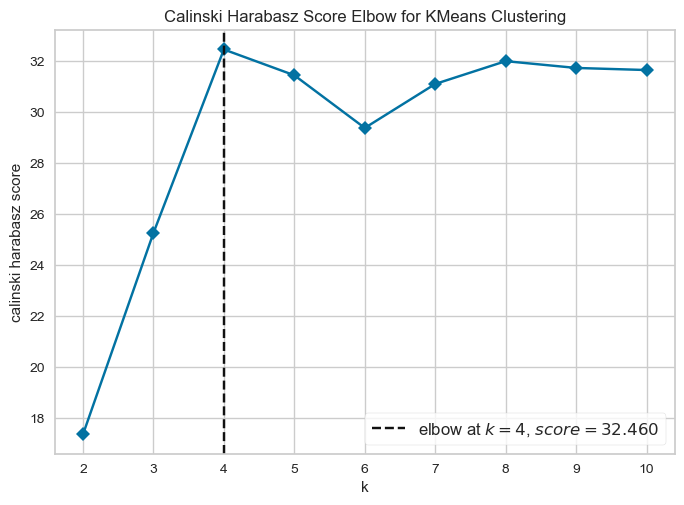

In [93]:
# Additional tool to apply the elbow rule
from yellowbrick.cluster import KElbowVisualizer

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
df_market_data_scaled["coin_id"] = df_market_data.index
df_market_data_scaled.set_index("coin_id", inplace=True)

# Perform PCA to reduce dimensions to 3
pca_model = PCA(n_components=3)
pca_market_data = pca_model.fit_transform(df_market_data_scaled)

# Convert the PCA results to a DataFrame
pca_market_data_df = pd.DataFrame(pca_market_data, columns=["PCA1", "PCA2", "PCA3"])
pca_market_data_df["Crypto_names"] = df_market_data.index
pca_market_data_df.set_index("Crypto_names", inplace=True)

# Additional tool to select k applying Calinski-Harabasz metric
model_used = KMeans()
visualizer = KElbowVisualizer(
    model_used, 
    k=(2, 11), 
    metric='calinski_harabasz', 
    timings=False
)

# Fit the visualizer to the scaled data
visualizer.fit(df_market_data_scaled)        
visualizer.show();


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Best Value for k is 4. I used the Calinski-Harabasz method to determine this. The Calinski-Harabasz index is a measure of cluster validity, and it evaluates the ratio of the sum of between-cluster dispersion and within-cluster dispersion. The higher the score, the better the clustering result, making k=4 the optimal choice based on this method.

This method helps ensure that the clusters are dense and well-separated, providing a good balance between the number of clusters and the quality of clustering.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [94]:
# Initialize the K-Means model using the best value for k
k_means_model = KMeans(n_clusters=4, random_state=0)


In [95]:
# Fit the K-Means model using the scaled data

k_means_model.fit(df_market_data_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [96]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_segments = k_means_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(crypto_segments)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [97]:
# Create a copy of the DataFrame
df_copy = df_market_data_scaled.copy()


In [98]:
# Add a new column to the DataFrame with the predicted clusters
# Ensure you have a DataFrame called market_data_predictions
# Create a copy of the DataFrame if it doesn't exist yet
market_data_predictions = df_market_data_scaled.copy()
market_data_predictions['CryptoCluster'] = crypto_segments

# Display sample data
market_data_predictions.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [99]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create a scatter plot using hvPlot
predictions_scatter_plot = market_data_predictions.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='CryptoCluster',
    hover_cols=['CryptoCluster', 'coin_id'],
    title='Scatter Plot by Crypto Currency Segment - k=4',
    xlabel='24-Hour Price Change Percentage',
    ylabel='7-Day Price Change Percentage',
    frame_width=700,
    frame_height=500
)

# Display the scatter plot
predictions_scatter_plot




:NdOverlay   [CryptoCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,CryptoCluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [100]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [101]:
# Use the PCA model with `fit_transform` to reduce to three principal components
pca_market_data = pca_model.fit_transform(df_market_data_scaled)

# Convert the PCA results to a DataFrame for easier handling
pca_market_data_df = pd.DataFrame(
    pca_market_data,
    columns=['PCA1', 'PCA2', 'PCA3']
)

pca_market_data_df.head()

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [102]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca_model.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

In [103]:
explained_variance_ratio = pca_model.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance_ratio)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 89.50%.

PC1: 0.3719856
PC2: 0.34700813
PC3: 0.17603793

0.3719856+0.34700813+0.17603793=0.89503166
0.89503166×100=89.50%



In [104]:
# Create a new DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    pca_market_data,  # PCA-transformed data
    columns=["PCA1", "PCA2", "PCA3"]  # Column names for the PCA components
)

# Copy the crypto names from the original data
market_data_pca_df["Crypto_names"] = df_market_data.index

# Set the 'Crypto_names' column as the index
market_data_pca_df.set_index("Crypto_names", inplace=True)

# Display sample data
market_data_pca_df.head()



,PCA1,PCA2,PCA3
Crypto_names,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [105]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))  
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [106]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

# Create an empty list to store the inertia values
inertia_values = []

# Loop through k-values from 1 to 11
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA data
    kmeans.fit(pca_market_data_df)
    
    # Append the inertia of the model to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a DataFrame with the inertia values
df_elbow = pd.DataFrame({'k': list(range(1, 12)), 'Inertia': inertia_values})

# Display the DataFrame
df_elbow.head()



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

,k,Inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


In [107]:
# Create a dictionary with the data to plot the Elbow curve# Create a list with the number of k-values from 1 to 11
elbow_data = {
    'k': k_values,      # Number of clusters
    'Inertia': inertia_values  # Corresponding inertia values
}

In [108]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x='k', 
    y='Inertia', 
    title="Elbow Curve", 
    xlabel="Number of Clusters (k)", 
    ylabel="Inertia", 
    xticks=list(k_values),
    line_width=2,
    color='blue'
)

elbow_plot

:Curve   [k]   (Inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** again the best value for the number of clusters k is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. Both the PCA-transformed data and the original data analysis suggest that the optimal number of clusters is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [109]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model using the best value for k
optimal_k = 4  # Replace this with the optimal k value you determined from the elbow plot
k_means_model = KMeans(n_clusters=optimal_k, random_state=0)

# Initialize the KMeans model with the best number of clusters (let's assume k=4 here)
k_means_pca_model = KMeans(n_clusters=4, random_state=0)

# Fit the model using PCA-transformed data
k_means_pca_model.fit(pca_market_data_df)

# Predict clusters
pca_crypto_segments = k_means_pca_model.predict(pca_market_data_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [110]:
# Fit the K-Means model using the PCA data

k_means_model.fit(df_market_data_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [111]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_segments = k_means_model.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
print(crypto_segments)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [112]:
# Create a copy of the DataFrame with the PCA data
pca_market_data_copy = pca_market_data_df.copy()

# Ensure the coin IDs are available in the original DataFrame
# Assuming the original coin IDs are in df_market_data.index
pca_market_data_copy['coin_id'] = df_market_data.index

# Add a new column to the DataFrame with the predicted clusters
pca_market_data_copy['Cluster'] = pca_crypto_segments

# Set 'coin_id' as the index if you want to keep it as the index
pca_market_data_copy.set_index('coin_id', inplace=True)

# Display sample data

pca_market_data_copy.head()



,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [113]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


# Create a scatter plot using hvPlot
scatter_plot = pca_market_data_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Cluster',  # Color by cluster
    cmap='viridis',  # Colormap for better visualization
    hover_cols=['Cluster', 'coin_id'],  # Columns to show on hover
    title='PCA Scatter Plot with K-Means Clusters',
    xlabel='PCA1',
    ylabel='PCA2',
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [117]:
import pandas as pd
import hvplot.pandas

# Example k-values and inertia values
k_values = list(range(1, 12))

# Example inertia values for two different scenarios
inertia1 = [287.0, 195.8, 123.2, 79.0, 65.3, 55.0, 50.0, 45.0, 40.0, 38.0, 35.0]  # Replace with actual inertia values
inertia2 = [300.0, 190.0, 130.0, 85.0, 70.0, 60.0, 50.0, 46.0, 42.0, 39.0, 36.0]  # Replace with actual inertia values

# Create DataFrames
elbow_df1 = pd.DataFrame({'k': k_values, 'inertia': inertia1})
elbow_df2 = pd.DataFrame({'k': k_values, 'inertia': inertia2})

# Composite plot to contrast the Elbow curves
composite_elbow_plot = (
    elbow_df1.hvplot.line(x='k', y='inertia', title='Elbow Curve Comparison', color='blue', label='Scenario 1') +
    elbow_df2.hvplot.line(x='k', y='inertia', color='red', label='Scenario 2')
)

# Display the composite plot
composite_elbow_plot



:Layout
   .Curve.Scenario_1 :Curve   [k]   (inertia)
   .Curve.Scenario_2 :Curve   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features for clustering with K-Means can make it easier to see patterns and relationships between clusters. However, it might also lose important details, which can affect the clustering quality. Reducing features with PCA helps in visualizing clusters better but balancing this with preserving important data is crucial.